Yennifer Yuliana Guerrero Uchima cc.1007694473



## Cancelación sustractiva



**serieSn**. Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

- 
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1} 
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados  pueden tener resultados numéricos diferentes.


- Escribir un programa que realice el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$
- Estudiar la convergencia de la serie para los tres casos.
- Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función 
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|$, i = 1, 2. Considere valores de $N = 1\times 10^{6}$.
- Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página 
39 del libro del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

In [57]:
zx = 1e16
zx2 = 2*zx
zx2/(zx2+1), zx/(zx+1)

(1.0, 1.0)

In [7]:
import numpy as np
import math as mt
import matplotlib.pylab as plt

- Escribir un programa que realice el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$

- 1
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1} 
\end{equation}


In [8]:
def serie1(N):
    serie=0
    for n in range(1,2*N+1):
        num=((-1)**n)*n
        den=n+1
        serie=serie+(num/den)
    return serie

In [4]:
s1=serie1(1000000)# calculando para N=1*10^6
s1

0.3068525694401464

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

In [23]:
def serie2(N):
    serie0=0
    serie00=0
    for n in range(1,N+1):
        num1=2*n-1
        den1=2*n
        num2=2*n
        den2=2*n+1
        serie0=serie0+(num1/den1)
        serie00=serie00+(num2/den2)
        
    return serie00-serie0
    #el contador de la suma desde donde empieza?

In [6]:
s2=serie2(1000000)# calculando para N=1*10^6
s2

0.30685257457662374

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}


In [24]:
def serie3(N):
    serie=0
    for n in range(1,N+1):
        den=2*n*((2*n)+1)
        serie=serie+1/den
    return serie
    

In [25]:
s3=serie3(1000000)# calculando para N=1*10^6
s3

0.306852569440241

- Estudiar la convergencia de la serie para los tres casos.

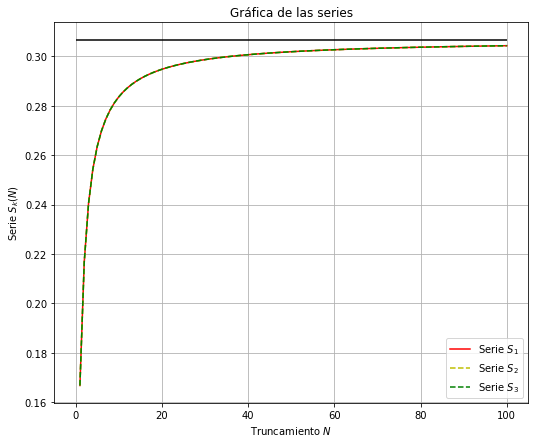

In [26]:
'''' ------- Gráfica de cada serie ------- '''
N = 100
nt = np.arange(1, N+1, 1)
s1a = s2a = s3a = np.zeros(N)

for i in range(1, N+1):
    s1a[i-1] = serie1(i)
    s2a[i-1] = serie2(i)
    s3a[i-1] = serie3(i)

plt.figure(figsize=(8.5, 7))
plt.title('Gráfica de las series')
plt.plot(nt, s1a, c='r', label='Serie $S_1$')
plt.plot(nt, s2a, '--', c='y', label='Serie $S_2$')
plt.plot(nt, s3a, '--', c='g', label='Serie $S_3$')
plt.xlabel('Truncamiento $N$')
plt.ylabel('Serie $S_k(N)$')
plt.hlines(s3,0,N)
plt.legend()
plt.grid()

Como se puede observar de las gráficas,para cada una de las series es posible encontrar una recta que la acote. 
Esto es, se puede aumentar el valor de n tanto como se quiera, pero la grafica de la serie no intersecta tal recta.

Las tres series convergen a un valor cercano, como se puede observar tomando n=1000000 tenemos los valores de 0.3068525694401464, 0.30685257457662374 y 0.306852569440241 para s1,s2 y s3 respectivamente.

CONSIDERANDO $S_N^{(3)}$ COMO LA SOLUCIÓN EXACTA

In [27]:
#Cálculo del error relativo respecto a la serie 3
def error(serie,N):
    E=np.abs((serie(N)-serie3(N))/serie3(N))
    return E
    

In [28]:
error(serie1,1000000)

3.0826204867899853e-13

In [29]:
error(serie2,1000000)

1.6738927012830728e-08

In [30]:
Nt=1000
E1=np.zeros(Nt)#se guardarán los errores asoiciados a la serie1
E2=np.zeros(Nt)##se guardarán los errores asoiciados a la serie2
N=np.arange(1,Nt+1,1)
for i in range(1,Nt+1):
    E1[i-1] =error(serie1,i)
    E2[i-1] =error(serie2,i)

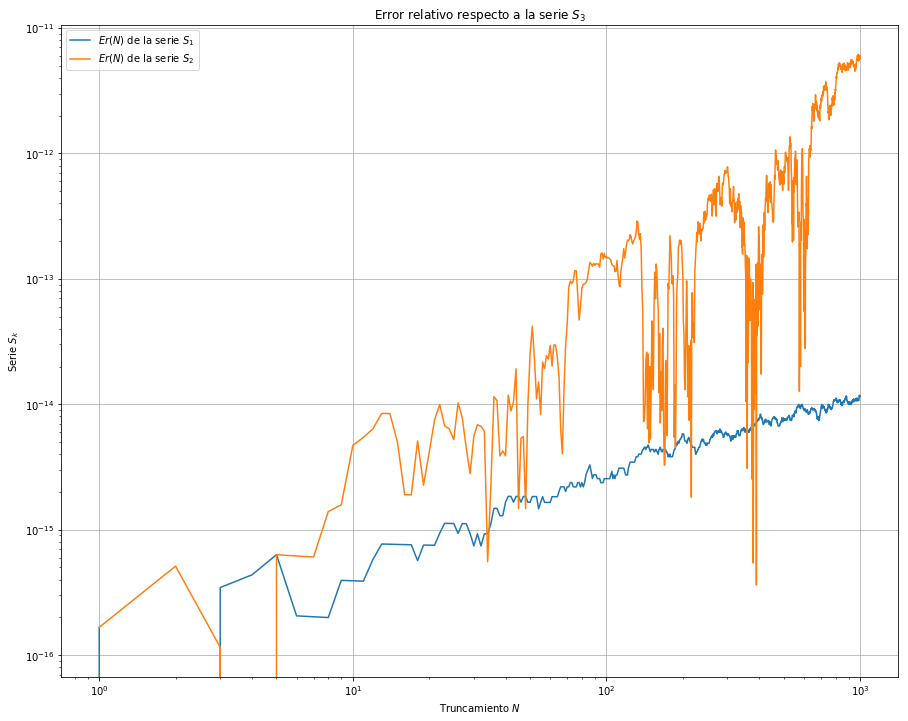

In [22]:
plt.figure(figsize=(15, 12))
plt.title('Error relativo respecto a la serie $S_3$')
plt.yscale('log')
plt.xscale('log')
plt.plot(N, E1, label='$Er(N)$ de la serie $S_1$')
plt.plot(N, E2, label='$Er(N)$ de la serie $S_2$')
plt.xlabel('Truncamiento $N$')
plt.ylabel('Serie $S_k$')
plt.legend()
plt.grid()

Para ambas series el error aumenta conforme se toma un N mayor que trunque la respectia serie.
Para la serie 1 el error oscila en ciertos valores, graficamente se puede trazar una recta para la que todos los valores de error estén muy próximos a ella.
En la serie 2 no es posible ajustas el error a una recta.


Al aumentar n en S1, los sucesivos valores de la serie se hacen cada vez más cercanos y por la alternacia  de esta, se realiza una resta en valores demasiados próximos con un error cosiderable según la cancelación subtractiva.

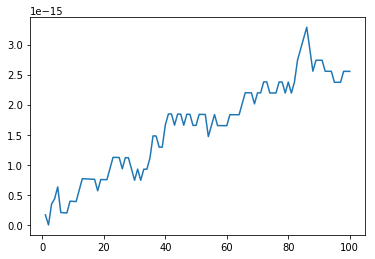

In [35]:
plt.plot(N, E1, label='$Er(N)$ de la serie $S_1$')

## **Errores de redondeo**. Caos numérico en un mapa logístico y errores de punto flotante (Errores de redondeo)

> Un ejemplo clásico de caos,  es el comportamiento no lineal en las interaciones de un mapa logistico 

\begin{equation}
x_{n+1}=f(x_n)=rx_n(1-x_n)
\end{equation}

> con $x\in (0,1)$ y $r\in(0,4)$ se pueden producir varios comportamientos sorprendentes.


> ### Problema: 
Encontrar tres formas diferentes de expresar $f(x)$  y calcular la evolución de la misma condición inicial después de cientos de iteraciones. Para este problema, será extremadamente útil  ver sus resultados gráficamente; construya listas de números y llame la libreria matplotlib. 


>#### Hint: valores numéricos de r y x0 que puede tomar:


```python
    >>> r = [1.9, 2.9, 3.1, 3.5, 3.9]

    >>> x0 = 0.6 # any number in [0,1] will do here

    >>> numpoints = 100
       ```
       

In [20]:
#misma condicion inicial para las tres formas de escribir f(x)
x0=0.6

\begin{equation}
x_{n+1}=f(x_n)=rx_n(1-x_n)
\end{equation}


In [21]:
def f1(x, r):#calcula la población para un tiempo
  """
  Funcion para calcular la poblacion en un tiempo.
  Input:
    x: Poblacion inicial  
    r: tasa de crecimiento.
  Output
    x: Poblacion final   
  """
  x = r * x * (1 - x)
  return x

In [22]:
#calcula la población para varios tiempos 

def mapa_logistico(f,xi, r, Ntiempos):
    """
  Construye un array con la poblacion para un numero Ntiempos definido.
    xi: Poblacion inicial  
    r: tasa de crecimiento.
    f: función que modela la población 
    Ntiempos: Número de tiempos sobre los que se calcula la población
  Output
    poblacion_: Array con la Poblacion final
    """
    poblacion_ = np.zeros(Ntiempos)
    for i in range(0, Ntiempos):
        xn = f(xi, r)
        xi = xn
        poblacion_[i] = xn
    return poblacion_ 

In [4]:
#Grafica de la evolución de la población en el tiempo 
def evolucion(f, txt):
      """
  Construye un gráfico de la evolución de la poblacion según la función
  f para un
  numero Ntiempos definido.
    
    f: función que modela la población 
    txt:función escrita en latex, etiqueta 
   
    """
    Ntiempos = 100
    N = np.arange(0, Ntiempos, 1)
    r = np.array([1.9, 2.9, 3.1, 3.5, 3.9])
    c = ['r', 'b', 'forestgreen', 'm', 'orangered']
    
    print("Evolución de la condición inicial en funcíon del tiempo")
    for i in range(5):
        plt.figure()
        p1 = mapa_logistico(f,x0,r[i], Ntiempos)
        plt.plot(N, p1, color=c[i], label="$%s$ para r_%s = %s" %(txt, i, r[i]))

        plt.xlabel('Tiempo $t$')
        plt.ylabel('Evolución $x_n$')    
        plt.legend()
        plt.grid()
        plt.show()

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 12)

Evolución de la condición inicial en funcíon del tiempo


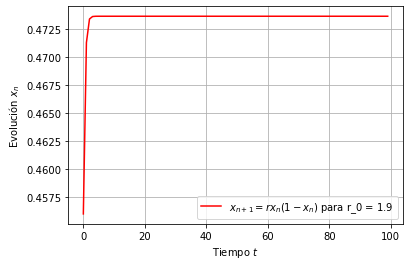

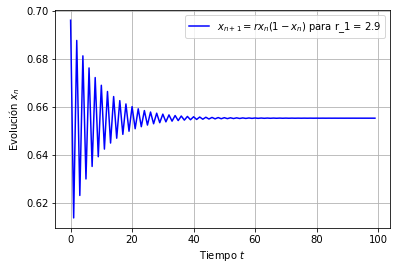

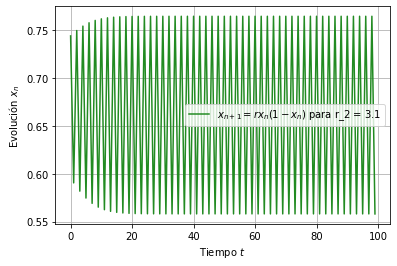

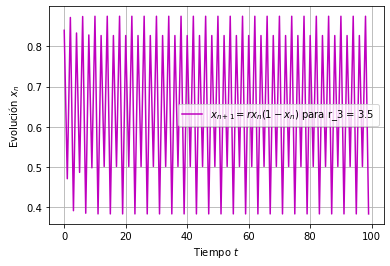

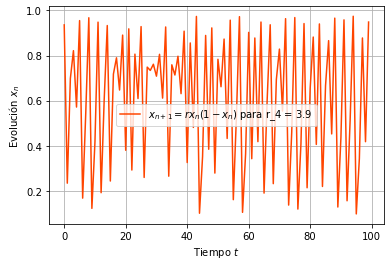

In [42]:
tf1 = 'x_{n+1}=rx_n(1-x_n)'
evolucion(f1, tf1)

r=1.9 la población en un poco tiempo crece a volres muy grandes, pero posteriormente llega a ser casi consante.

r=2.9 la evolucion de la condicon inicial siempre esta oscilando alrededor de un valor, y conforme el aumneta el tiempo se acerca más a tal valor.

r=3.1 la evolución oscila entre un valor fijo manteniendo la cota superior e inferior casi constantes en el tiempo

r=3.5 la evolución oscila entre un valor fijo, tiene dos cotas inferiores y superiores que va alternando en el tiempo.

r=3.9 Le evolución no oscila ni tiende a algún valor, está acotada.


\begin{equation}
x_{n+1}=f(x_n)=rx_n-rx_n^2
\end{equation}


In [44]:
def f2(x, r):#calcula la población para un tiempo
  """
  Funcion para calcular la poblacion en un tiempo.
  Input:
    x: Poblacion inicial  
    r: tasa de crecimiento.
  Output
    x: Poblacion final   
  """
  x = r * x -r* x**2
  return x

Evolución de la condición inicial en funcíon del tiempo


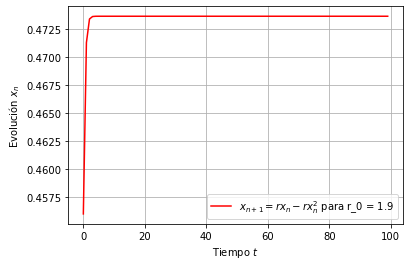

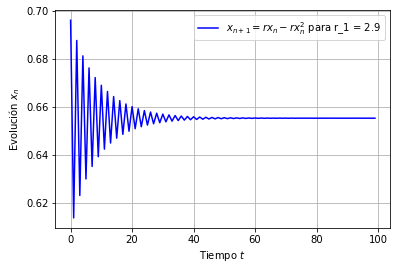

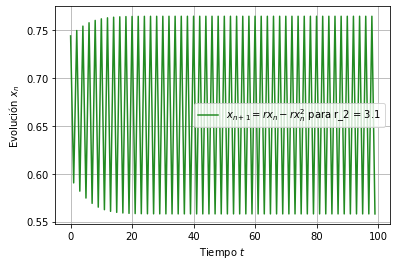

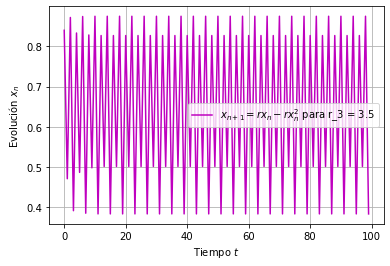

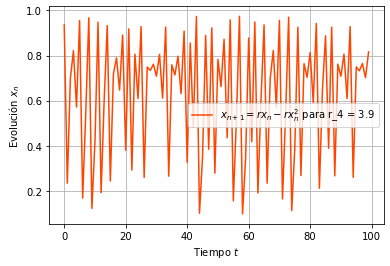

In [46]:
tf2 = 'x_{n+1}=rx_n-rx_n^2'
evolucion(f2, tf2)

La evolución de la condición incial en el tiempo con f2 para los diferentes valores de r es análoga a la evolución  para f1.

\begin{equation}
x_{n+1}=f(x_n)=rx_n^2(\frac{1}{x_n}-1)
\end{equation}

In [48]:
def f3(x, r):#calcula la población para un tiempo
  """
  Funcion para calcular la poblacion en un tiempo.
  Input:
    x: Poblacion inicial  
    r: tasa de crecimiento.
  Output
    x: Poblacion final   
  """
  x = (r*x**2)*((1/x)-1)
  return x

Evolución de la condición inicial en funcíon del tiempo


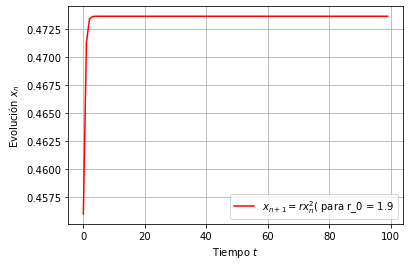

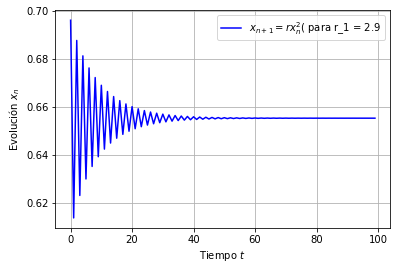

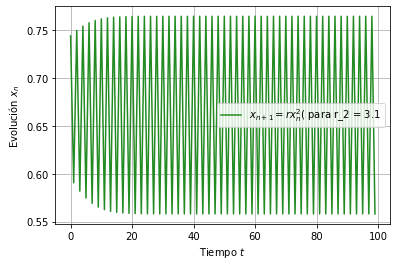

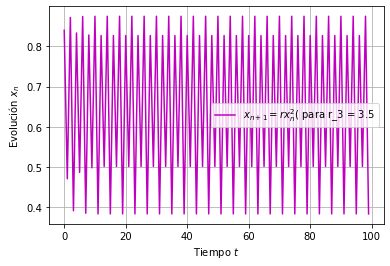

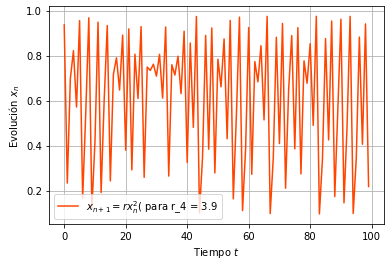

In [49]:
tf3 = 'x_{n+1}=rx_n^2(\frac{1}{x_n}-1)'
evolucion(f3, tf3)

La evolución de la condición incial en el tiempo con f3 para los diferentes valores de r es análoga a la evolución  para f1 y f2.